# Manifold Learning with t-SNE

While PCA is often a good first approach for transforming your data so that you might be able to visualize it using a scatter plot, the nature of the method (applying a rotation and then dropping directions) limits its usefulness, as we saw with the scatter plot of the Labeled Faces in the Wild dataset. There is a class of algorithms for visualization called manifold learning algorithms that allow for much more complex mappings, and often provide better visualizations. A particularly useful one is the t-SNE algorithm.

Manifold learning algorithms are mainly aimed at visualization, and so are rarely used to generate more than two new features. Some of them, including t-SNE, compute a new representation of the training data, but don’t allow transformations of new data. This means these algorithms cannot be applied to a test set: rather, they can only transform the data they were trained for. Manifold learning can be useful for exploratory data analysis, but is rarely used if the final goal is supervised learning. The idea behind t-SNE is to find a two-dimensional representation of the data that preserves the distances between points as best as possible. t-SNE starts with a random twodimensional representation for each data point, and then tries to make points that are close in the original feature space closer, and points that are far apart in the original feature space farther apart. t-SNE puts more emphasis on points that are close by, rather than preserving distances between far-apart points. In other words, it tries to preserve the information indicating which points are neighbors to each other.

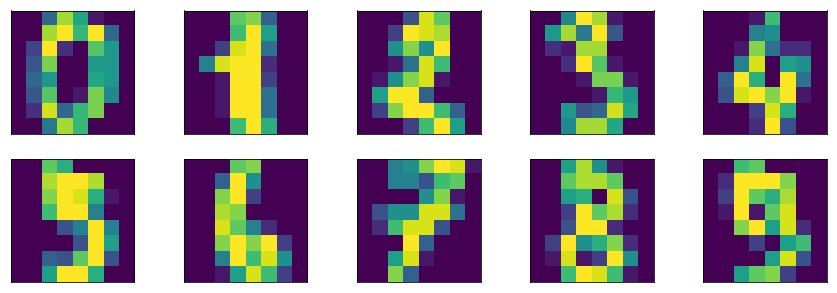

In [5]:
# We apply the t-SNE manifold learning algorithm on a dataset of handwritten digits

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits=load_digits()

fig,axes=plt.subplots(2,5,figsize=(15,5),subplot_kw={'xticks':(),'yticks':()})
for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

In [7]:
# build a PCA model
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(digits.data)
# tranform the digits data onto the first two principal components
digits_pca=pca.transform(digits.data)

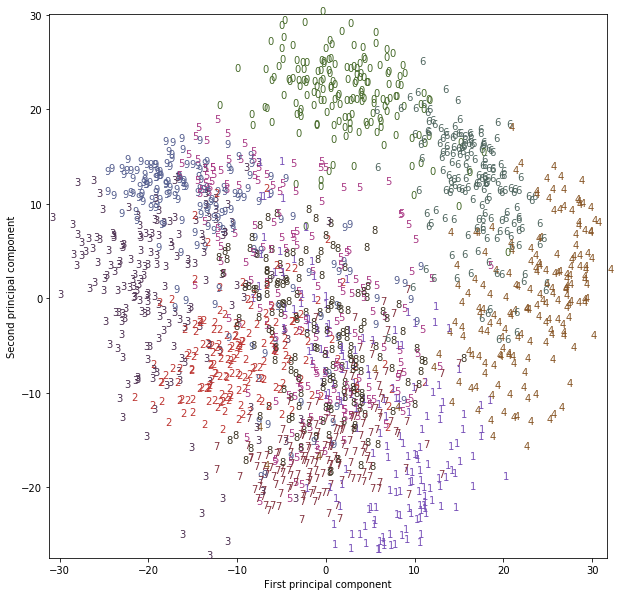

In [11]:
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"] 
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),color=colors[digits.target[i]])
    plt.xlabel("First principal component")
    plt.ylabel('Second principal component')

Here, we actually used the true digit classes as glyphs, to show which class is where. The digits zero, six, and four are relatively well separated using the first two principal components, though they still overlap. Most of the other digits overlap significantly.

Text(0, 0.5, 't-SNE feature 1')

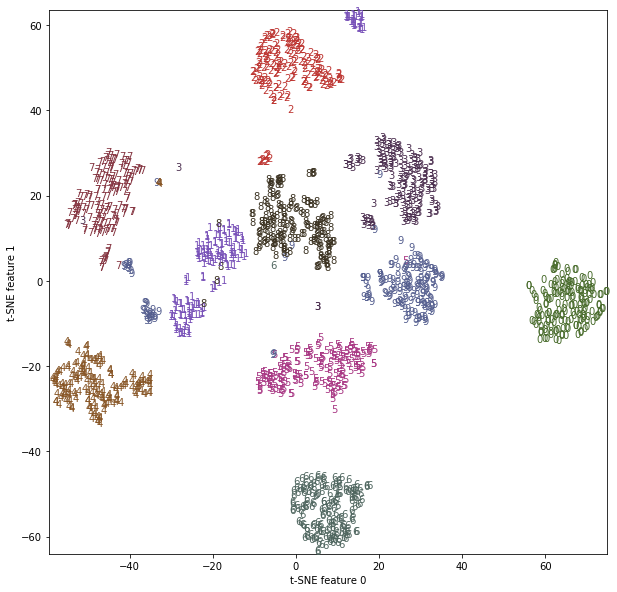

In [16]:
# Let's apply t-SNE to the same dataset and compare the results.
from sklearn.manifold import TSNE
tsne=TSNE(random_state=42)
digits_tsne=tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),color=colors[digits.target[i]])
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')

The result of t-SNE is quite remarkable. All the classes are quite clearly separated. The ones and nines are somewhat split up, but most of the classes form a single dense group. Keep in mind that this method has no knowledge of the class labels: it is completely unsupervised. Still, it can find a representation of the data in two dimensions that clearly separates the classes, based solely on how close points are in the original space. 